# 機器學習及應用期末報告

# 題目：影像辨識-硬幣辨識
### 系級：電子碩一甲
### 學號：F112112106
### 姓名：陳陽棋
***
# 預期功能
## 透過影像辨識的方式抓取硬幣，接者使用機器學習分類硬幣種類
## 最後將辨識結果秀出來
### 辨識流程如下：
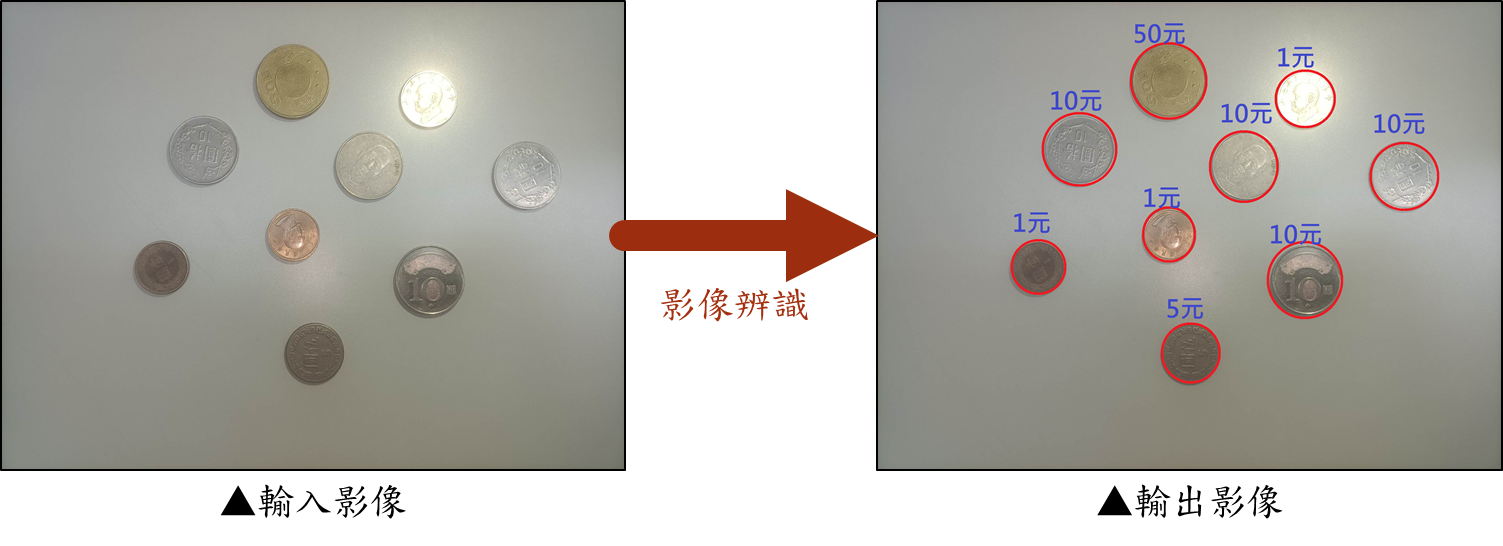
***

# 模型訓練與讀取流程
## 整個流程共有4個python檔
### 1.creat-dataset.py：產生資料集。讀取硬幣圖檔，將其轉換成資料集
### 2.feature-engineering.py：特徵工程。尋找最佳機器學習方法與參數
### 3.train-model.py：產生模型檔。輸出模型檔提供硬幣辨識演算法分類硬幣種類
### 4.coinDetect.py：硬幣辨識。此演算法可抓取硬幣及辨識硬幣種類
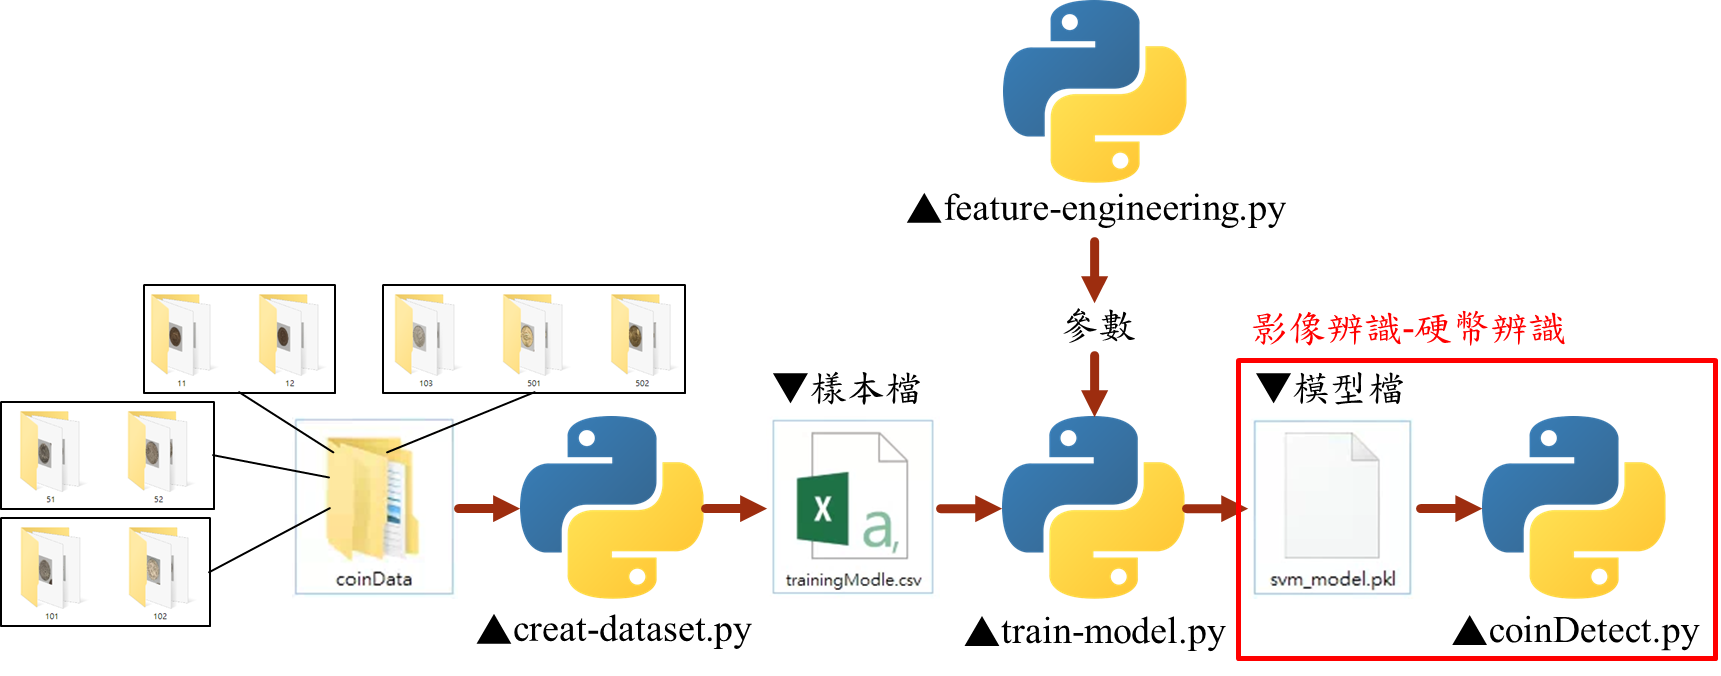
***

# =========================產生資料集=========================
## 匯入相關套件

In [1]:
import os
import csv
import cv2
import numpy as np

## 建立計算取樣點平均值函式
### 計算影像取樣點的平均值，取樣點如下圖所示，取以下9點數值的平均作為該影像的代表值
### 因此分別輸入RGB三種影像透過此函示計算後便可取得三種平均值

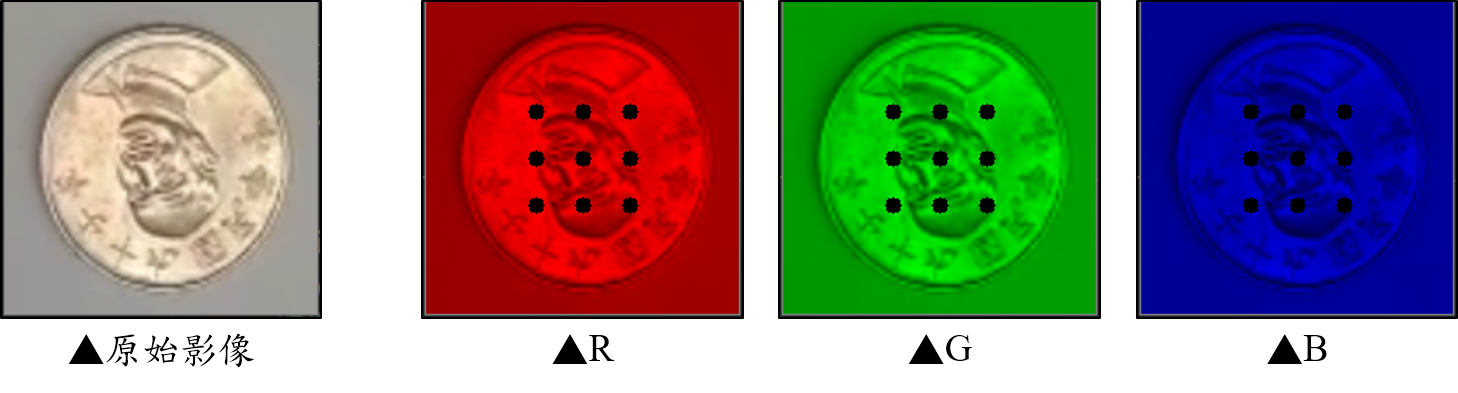

In [2]:
def calculateColorAvg(channel, center, offset = 5):    
    neighbors = [(center[0] + dx, center[1] + dy) for dx in range(-offset, offset+1, offset) for dy in range(-offset, offset+1, offset)]
    values = [channel[y, x] for x, y in neighbors]
    average_value = int(sum(values) / len(values))
    
    return average_value

## 建立索伯算子函式
### 透過索柏算子可顯示出硬幣紋理特徵

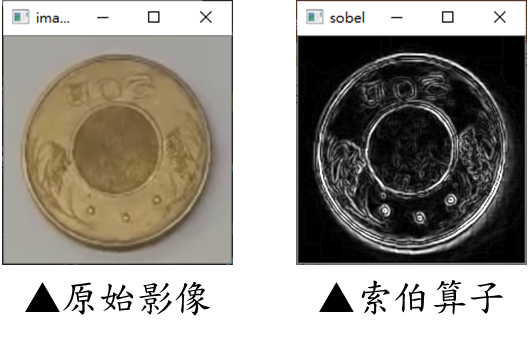

In [3]:
def sobelEdgeDetection(f):
    grad_x = cv2.Sobel(f, cv2.CV_32F, 1, 0, ksize = 3)
    grad_y = cv2.Sobel(f, cv2.CV_32F, 0, 1, ksize = 3)
    magnitude = abs(grad_x) + abs(grad_y)
    g = np.uint8(np.clip(magnitude, 0, 255))

    return g

## 建立特徵值計算函式
### 透過計算取樣點平均值函式分別取得RGB的平均值作為特徵
### 接著使用索伯算子計算y軸中心點的折線圖(紅色虛線)，分別計算此折線圖的標準差及平均值作為特徵

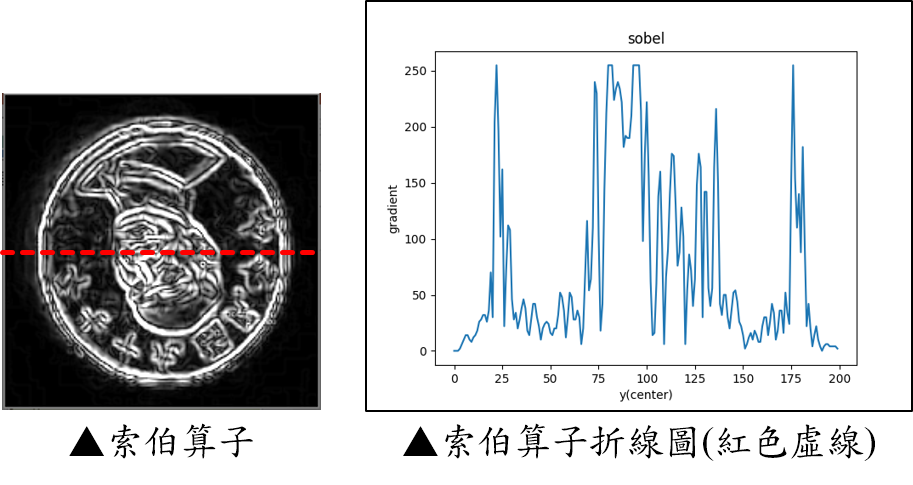

In [4]:
def calculateFeature(image, center):
    B = calculateColorAvg(image[:, :, 0], center)
    G = calculateColorAvg(image[:, :, 1], center)
    R = calculateColorAvg(image[:, :, 2], center)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobel_image = sobelEdgeDetection(gray_image)
    His_AVG = int(sobel_image[center[0]].mean())
    His_STD = int(sobel_image[center[0]].std())
    
    return R, G, B, His_AVG, His_STD

## 讀取硬幣圖片資料夾
### 將該硬幣對應的資料夾名稱作為機器學習的y值
### 透過特徵值計算將圖片轉換成數值作為機器學習的x值
### 4種臺幣硬幣(50元、10元、5元、1元)分為9類

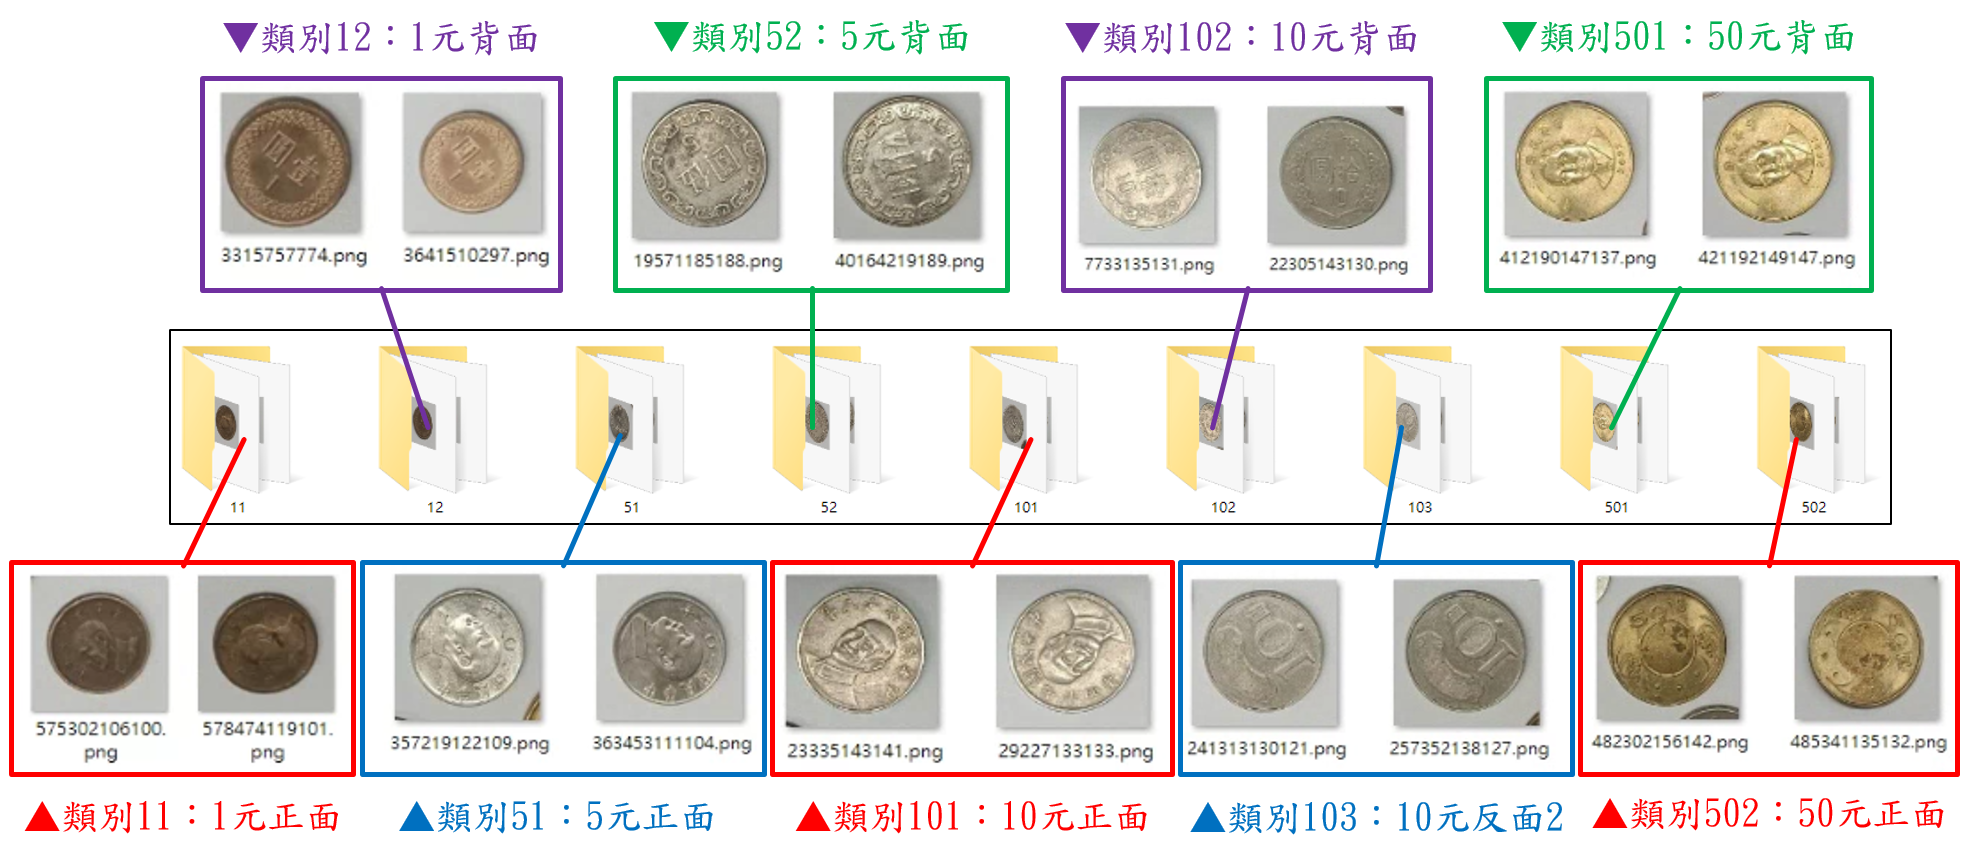

### 為避免硬幣擺放角度不同而造成辨識率下降，因此透過影像旋轉的方式擴增樣本

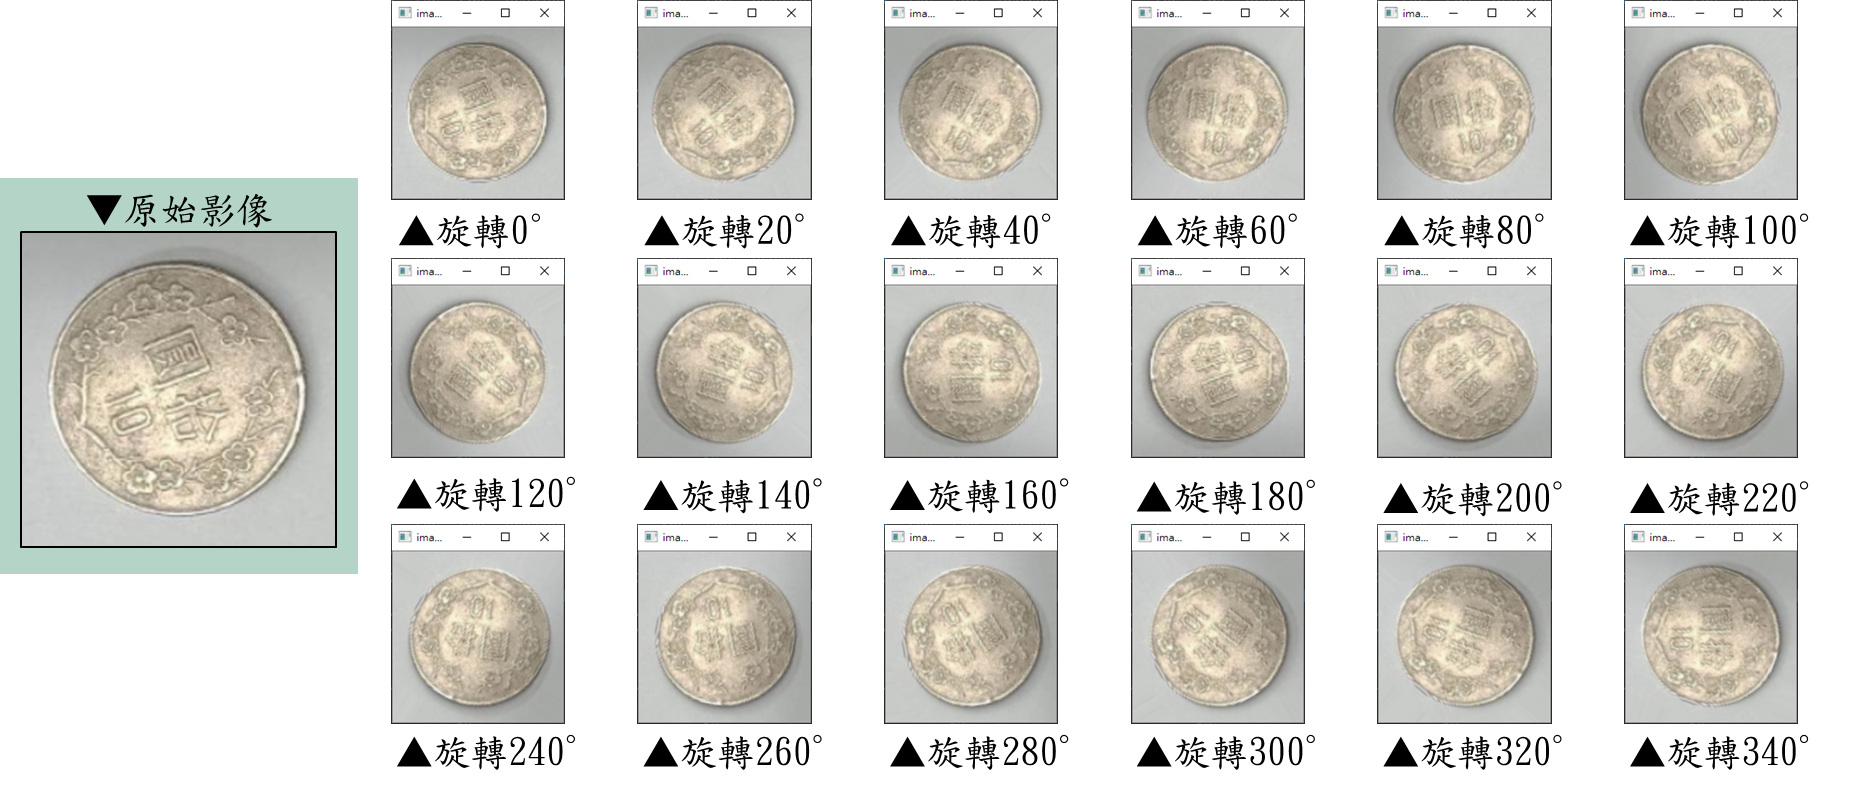

## 建立產生CSV檔函式

In [5]:
def createCSV(folder_path, csv_file_path):
    with open(csv_file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # 寫入CSV標題
        writer.writerow(['Image', 'R', 'G', 'B', 'His_AVG', 'His_STD', 'Label'])

        # 讀取資料夾中的所有資料夾
        for folder in os.listdir(folder_path):
            # 讀取資料夾內的所有影像
            for filename in os.listdir(folder_path + '/' + folder):
                print(filename)
                if filename.endswith('.jpg') or filename.endswith('.png'):  # 假設影像格式為.jpg或.png
                    image_path = os.path.join(folder_path + '/' + folder, filename)

                    image = cv2.imread(image_path)
                    image = cv2.resize(image,(45,45))
                    height, width = image.shape[:2]
                    center = (int(width / 2), int(height / 2))

                    # 定義旋轉角度和縮放比例
                    scale = 1.0
                    for angle in range(0,360,20):
                        # 構造旋轉矩陣
                        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
                        # 進行圖片旋轉，使用最近的邊界像素填充
                        rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), borderMode=cv2.BORDER_REPLICATE)

                        # 特徵值計算
                        R, G, B, His_AVG, His_STD = calculateFeature(rotated_image, center)
                        # 將特徵值寫入CSV檔案
                        writer.writerow([filename] + [R] + [G] + [B] + [His_AVG] + [His_STD] + [folder] )  # 寫入影像檔案名稱和像素值

    print('CSV檔案寫入完成。')

## 呼叫產生CSV檔函式，產生訓練用的資料集

In [6]:
# 硬幣圖檔資料夾路徑
train_folder_path = '../data/coinData'
# 訓練用CSV檔案路徑
train_csv_path = '../model/train.csv'

createCSV(train_folder_path, train_csv_path)

44097111130.png
44531697118.png
506476107116.png
518484102112.png
519313107118.png
519462106118.png
52149799113.png
52194109133.png
528116108128.png
53296111128.png
65852999111.png
65915597115.png
66152598112.png
66221595102.png
66320295103.png
66352598112.png
67818395102.png
67853194106.png
696511102112.png
697488104118.png
22305143130.png
390343140164.png
390405120142.png
40249160141.png
43645187164.png
504486189168.png
506214121142.png
51072170154.png
52418298130.png
533138115129.png
533188102125.png
536119121134.png
542113123134.png
542137164142.png
553317162144.png
555214112137.png
556221120132.png
557215113139.png
605230119135.png
606479137129.png
144478165191.png
295495113125.png
306218139159.png
306446145160.png
306472113132.png
307218139159.png
307275103116.png
308231144160.png
308462112134.png
528420132153.png
528478110130.png
529411131158.png
531398152194.png
531404128159.png
57475183205.png
723493171150.png
748125167140.png
778339159138.png
779163164152.png
779450168156.png

## 9類樣本、每類20張圖片、旋轉18種角度，共3,240筆資料。最後產生出來的資料集如下

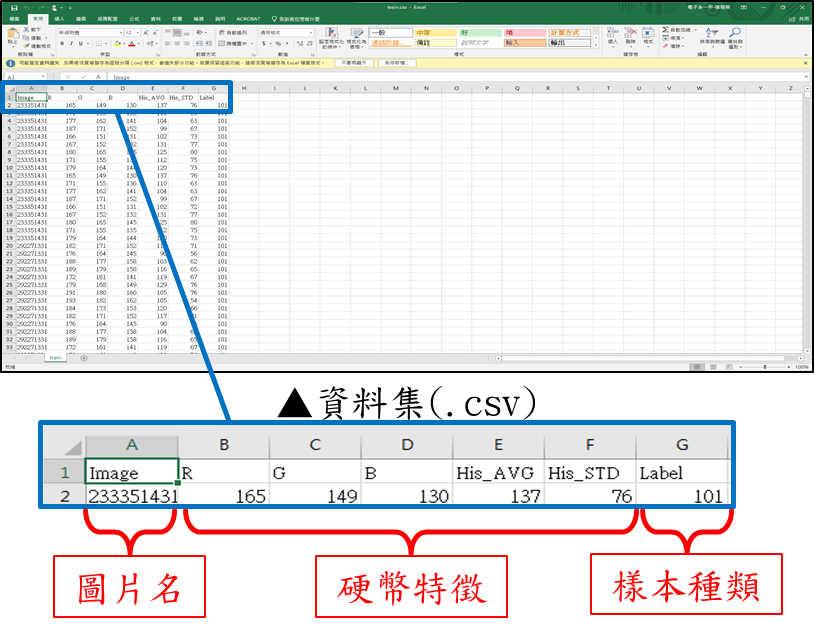

## 再次呼叫產生CSV檔函式，產生驗證用的資料集
## 每類3張圖片、旋轉18種角度，共486筆資料。

In [7]:
# 硬幣圖檔資料夾路徑
test_folder_path = '../data/coinData_verify'
# 測試用CSV檔案路徑
test_csv_path = '../model/verify.csv'

createCSV(test_folder_path, test_csv_path)

46996111129.png
50830599111.png
6702089099.png
43645187164.png
488450120140.png
506214121142.png
144478165191.png
25894156189.png
296429146165.png
1162669895.png
34220998114.png
59742293109.png
14830497117.png
3315757774.png
9750510293.png
267428199222.png
360507193179.png
621207197214.png
332462243204.png
475280211251.png
516149161193.png
249131167190.png
4242808095.png
58736795107.png
19571185188.png
34822998119.png
51717896119.png
CSV檔案寫入完成。
